# A Binary Classification Example
## Setup Jupyter, Conda...
```
$ conda create --name imdb # Crear un env, similar a un gemset de Ruby
$ conda activate imdb
$ source activate imdb
$ conda install ipykernel # Para que Jupyter reconozco el env de Conda
$ jupyter notebook
```

## Loading the IMDB dataset

In [6]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.
/Users/carmelo.cuenca/anaconda3/envs/imdb/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


17465344/17464789 [==============================] - 4s 0us/step


## Mapping integer indices to words

In [27]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## Preparing the data

In [33]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = g the datanp.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

## Building the network

In [36]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Compiling the model

In [51]:
from keras import optimizers
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

## Configuring the model using custom losses and metrics

```
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
```

## Setting aside a validation set

In [44]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

## Training the model

In [52]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.0106 - acc: 0.9971 - val_loss: 0.7269 - val_acc: 0.8644
Epoch 2/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.0031 - acc: 0.9999 - val_loss: 0.7985 - val_acc: 0.8571
Epoch 3/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.0077 - acc: 0.9981 - val_loss: 0.7937 - val_acc: 0.8646
Epoch 4/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.0015 - acc: 0.9999 - val_loss: 0.8116 - val_acc: 0.8641
Epoch 5/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.0013 - acc: 0.9999 - val_loss: 0.9701 - val_acc: 0.8461
Epoch 6/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.0041 - acc: 0.9988 - val_loss: 0.8691 - val_acc: 0.8626
Epoch 7/20
15000/15000 [==============================] - 2s 111us/step - loss: 7.9584e-04 - acc: 0.9999 - val_loss: 0.920

## Plotting the training and validation loss

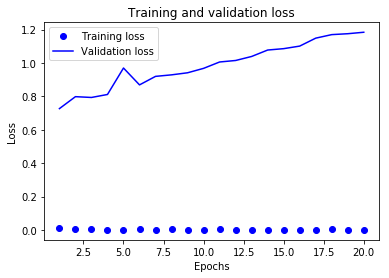

In [61]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Plotting the training and validation accuracy

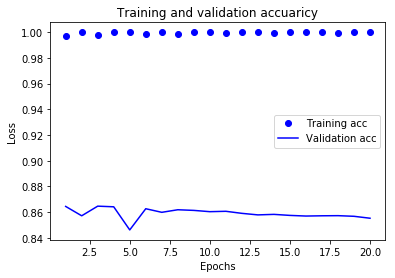

In [65]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuaricy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Retraining a model from scratch

In [72]:
model.fit(x_train,
          train_labels,
          epochs=4,
          batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.0811 - acc: 0.9741
Epoch 2/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.0702 - acc: 0.9782
Epoch 3/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.0620 - acc: 0.9812
Epoch 4/4
25000/25000 [==============================] - 4s 146us/step


In [73]:
results = model.evaluate(x_test, test_labels)
model.predict(x_test)

25000/25000 [==============================] - 2s 74us/step


array([[ 0.08730155],
       [ 0.99999976],
       [ 0.99784982],
       ..., 
       [ 0.27895865],
       [ 0.03452817],
       [ 0.98356485]], dtype=float32)